In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
directory = '../../../../Data/School/0001/'
file_name_label = '0001_hei label.txt'

file_label = os.path.join(directory, file_name_label)


Bad key "text.kerning_factor" on line 4 in
/Users/satoshi/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
file_name_data = '0001_hei.dat'

file_data = os.path.join(directory, file_name_data)
df = pd.read_csv(file_data, sep = '\t', error_bad_lines = False)

In [3]:
df

,gakkou,seibetu,q2_1,q2_2,q2_3,q2_4,q2_5,q2_6,q3.1,q3.2,q4.1,q4.3.1,q4.3.2,q5,q7,q8
0,101,1,2,,,,,,1,1,3,2,8,2,2,
1,101,1,1,,,,,,1,1,4,2,4,2,2,
2,101,1,1,,,,,,1,1,5,3,6,1,1,
3,101,1,2,,,,,,2,2,3,2,8,2,1,
4,101,1,5,,,,,,1,1,6,2,5,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8050,1312,2,5,4,,,,,2,1,1,2,3,1,2,
8051,1312,2,5,4,,,,,2,4,1,2,6,5,6,
8052,1312,2,5,4,,,,,2,4,1,2,8,6,1,
8053,1312,2,5,4,,,,,2,4,1,2,6,2,2,


In [4]:
abbrevaiton = {
    'GNDR': 'gender',
    'M':'male',
    'F':'female',
    'GDN':'guardian',
    'AFF':'Agriculture Forestry and Fishing',
    'MFG':'Manufacturing',
    'SRV':'Service',
    'ORS':'Others',
    'WC':'White Collar',
    'UE':'Unemployed',
    'UNK':'Unknown',
    'RSN':'reason',
    'SZ':'size',
    'FB':'family business',
}

In [5]:
gndr = {
    1:'M',
    2:'F'
}

In [6]:
gdn_occ = {
    1:'AFF',
    2:'AFF',
    3:'AFF',
    4:'MFG',
    5:'MFG',
    6:'SRV',
    7:'SRV',
    8:'SRV',
    9:'SRV',
    10:'WC',
    11:'ORS',
    12:'ORS',
    13:'ORS',
    14:'UE',
    15:'UK',
    99:'UNK',
}

In [7]:
heir = {
    1:'Y',
    2:'N',
    9:'UNK'
}

In [8]:
gdn_rel = {
    1: 'Eldest son / daughter',
    2: 'Second son / daughter',
    3: 'Third son / daughter',
    4: 'Fourth or more',
    5: 'Brother / Sister',
    6: 'Nephew Niece',
    7: 'UNK'
}

In [9]:
crs = {
    1: 'COM',
    2: 'IND',
    3: 'AGR',
    4: 'HHE',
    5: 'ENG',
    6: 'ORS',
}

In [10]:
rsn = {
    1: 'Housework',
    2: 'Family business',
    3: 'Preparation for further study',
    4: 'No job opportunity',
    5: 'Technology acquisition',
    6: 'Lack of labor capacity',
    7: 'Once employed',
    8: 'UNK',
    9: 'UNK'    
}

In [11]:
def apply_dict(col, dictionary, df = df):
    df[col] = df[col].map(dictionary)

In [12]:
col_dict = [['seibetu', gndr],
            ['q2_1', crs],
            ['q2_2', crs],
            ['q2_3', crs],
            ['q2_4', crs],
            ['q2_5', crs],
            ['q2_6', crs],            
            ['q3.1', heir],
            ['q3.2', gdn_rel],
            ['q4.1', gdn_occ],
            ['q5', rsn]
           ]

In [13]:
for item in col_dict:
    col = item[0]
    dictionary = item[1]
    apply_dict(col, dictionary)

In [14]:
def replace(col1, col2, key, df = df):
    # If df.col1's element equals key, replace it with the element in col2
    for idx, elements in enumerate(df[col1]):
        if elements == key:
            df[col1][idx] = df[col2][idx]
        else:
            df[col1][idx] = np.nan

In [15]:
#replace('q5', 'q4.1', 'Family business')

In [16]:
df['fb'] = df['q5'].copy()

In [17]:
replace('fb', 'q4.1', 'Family business')

/Users/satoshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/satoshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [18]:
df

,gakkou,seibetu,q2_1,q2_2,q2_3,q2_4,q2_5,q2_6,q3.1,q3.2,q4.1,q4.3.1,q4.3.2,q5,q7,q8,fb
0,101,M,IND,NaN,NaN,NaN,NaN,NaN,Y,Eldest son / daughter,AFF,2,8,Family business,2,,AFF
1,101,M,COM,NaN,NaN,NaN,NaN,NaN,Y,Eldest son / daughter,MFG,2,4,Family business,2,,MFG
2,101,M,COM,NaN,NaN,NaN,NaN,NaN,Y,Eldest son / daughter,MFG,3,6,Housework,1,,NaN
3,101,M,IND,NaN,NaN,NaN,NaN,NaN,N,Second son / daughter,AFF,2,8,Family business,1,,AFF
4,101,M,ENG,NaN,NaN,NaN,NaN,NaN,Y,Eldest son / daughter,SRV,2,5,Family business,2,1,SRV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8050,1312,F,ENG,NaN,NaN,NaN,NaN,NaN,N,Eldest son / daughter,AFF,2,3,Housework,2,,NaN
8051,1312,F,ENG,NaN,NaN,NaN,NaN,NaN,N,Fourth or more,AFF,2,6,Technology acquisition,6,,NaN
8052,1312,F,ENG,NaN,NaN,NaN,NaN,NaN,N,Fourth or more,AFF,2,8,Lack of labor capacity,1,,NaN
8053,1312,F,ENG,NaN,NaN,NaN,NaN,NaN,N,Fourth or more,AFF,2,6,Family business,2,,AFF


In [19]:
col_names = {
    'seibetu' : 'gndr',
    'q2_1': 'crs1',
    'q2_2': 'crs2',
    'q2_3': 'crs3',
    'q2_4': 'crs4',
    'q2_5': 'crs5',
    'q2_6': 'crs6',
    'q3.1' : 'heir',
    'q3.2' : 'gdn_rel',
    'q4.1' : 'gdn_occ',
    'q4.3.2' : 'fam_sz',
    'q5' : 'rsn',
}

In [20]:
df.rename(columns = col_names, inplace=True)

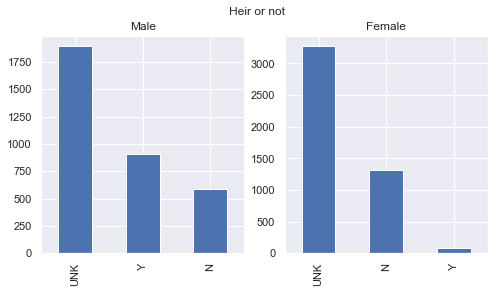

In [21]:
fig2, axs2 = plt.subplots(1,2, figsize=(8, 4))
df[df.gndr == 'M'].heir.value_counts().plot(kind = 'bar', ax =axs2[0])
df[df.gndr == 'F'].heir.value_counts().plot(kind = 'bar', ax = axs2[1])
axs2[0].title.set_text('Male')
axs2[1].title.set_text('Female')
fig2.suptitle('Heir or not')
plt.show()

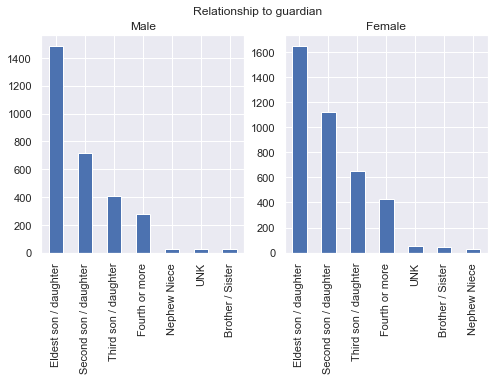

In [22]:
fig2, axs2 = plt.subplots(1,2, figsize=(8, 4))
df[df.gndr == 'M'].gdn_rel.value_counts().plot(kind = 'bar', ax =axs2[0])
df[df.gndr == 'F'].gdn_rel.value_counts().plot(kind = 'bar', ax = axs2[1])
axs2[0].title.set_text('Male')
axs2[1].title.set_text('Female')
fig2.suptitle('Relationship to guardian')
plt.show()

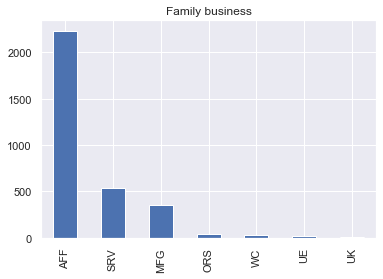

In [23]:
ax = df.fb.value_counts().plot(kind = 'bar')
ax.title.set_text('Family business')

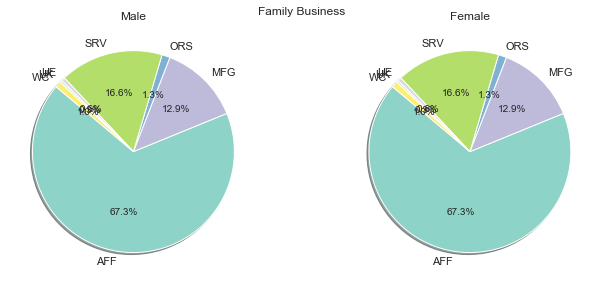

In [24]:
fig2, axs2 = plt.subplots(1,2, figsize=(10, 4))
df[df.gndr == 'M'].fb.value_counts().sort_index().plot.pie(ax =axs2[0],autopct='%1.1f%%',
shadow=True, startangle=140, cmap = 'Set3')
df[df.gndr == 'M'].fb.value_counts().sort_index().plot.pie(ax = axs2[1],autopct='%1.1f%%',
shadow=True, startangle=140, cmap = 'Set3')
axs2[0].title.set_text('Male')
axs2[1].title.set_text('Female')
axs2[0].axis('off')
axs2[1].axis('off')
plt.axis('off')
fig2.suptitle('Family Business')
plt.tight_layout()
#plt.savefig('../../../../Graphs/Employed/Location.pgf')

plt.show()

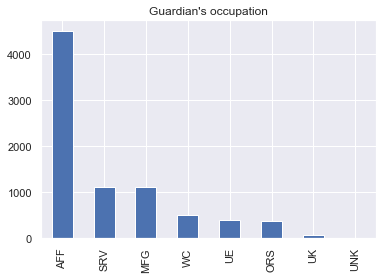

In [25]:
ax = df.gdn_occ.value_counts().plot(kind = 'bar')
ax.title.set_text("Guardian's occupation")

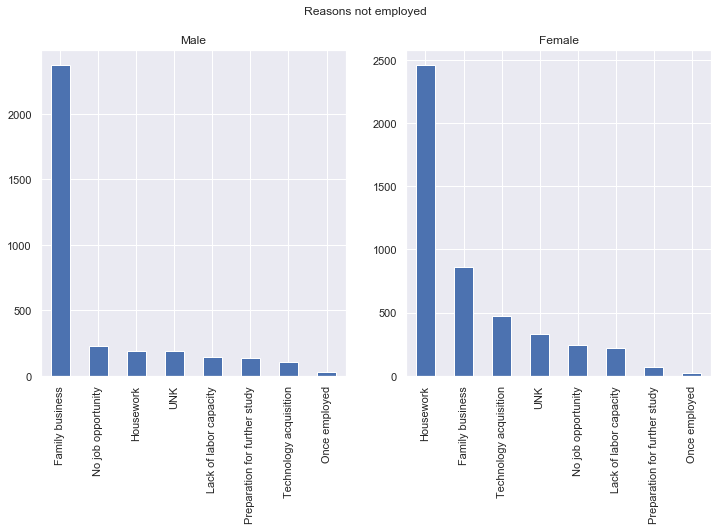

In [26]:
fig2, axs2 = plt.subplots(1,2, figsize = (12,6))
df[df.gndr == 'M'].rsn.value_counts().plot(kind = 'bar', ax =axs2[0])
df[df.gndr == 'F'].rsn.value_counts().plot(kind = 'bar', ax = axs2[1])
axs2[0].title.set_text('Male')
axs2[1].title.set_text('Female')
fig2.suptitle('Reasons not employed')
plt.show()

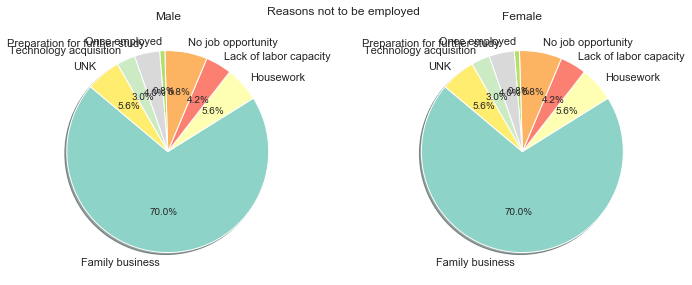

In [27]:
fig2, axs2 = plt.subplots(1,2, figsize=(10, 4))
df[df.gndr == 'M'].rsn.value_counts().sort_index().plot.pie(ax =axs2[0],autopct='%1.1f%%',
shadow=True, startangle=140, cmap = 'Set3')
df[df.gndr == 'M'].rsn.value_counts().sort_index().plot.pie(ax = axs2[1],autopct='%1.1f%%',
shadow=True, startangle=140, cmap = 'Set3')
axs2[0].title.set_text('Male')
axs2[1].title.set_text('Female')
axs2[0].axis('off')
axs2[1].axis('off')
plt.axis('off')
fig2.suptitle('Reasons not to be employed')
plt.tight_layout()
#plt.savefig('../../../../Graphs/Employed/Location.pgf')

plt.show()

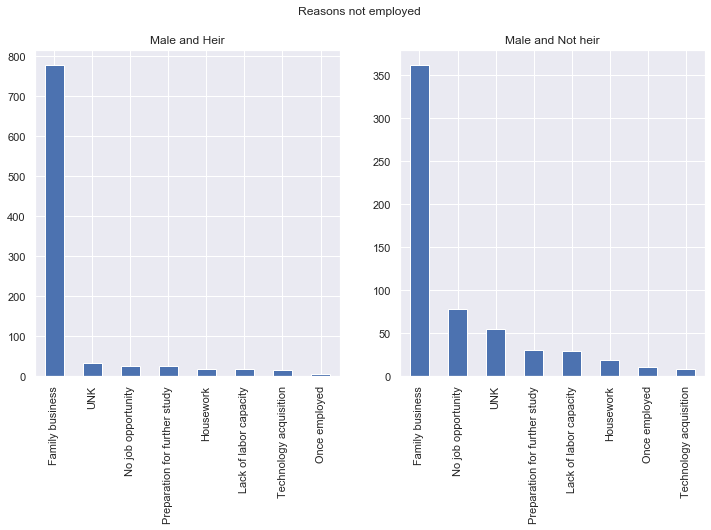

In [28]:
fig2, axs2 = plt.subplots(1,2, figsize = (12,6))
df[(df.heir == 'Y') & (df.gndr == 'M')].rsn.value_counts().plot(kind = 'bar', ax =axs2[0])
df[(df.heir == 'N') & (df.gndr == 'M')].rsn.value_counts().plot(kind = 'bar', ax = axs2[1])
axs2[0].title.set_text('Male and Heir')
axs2[1].title.set_text('Male and Not heir')
fig2.suptitle('Reasons not employed')
plt.show()

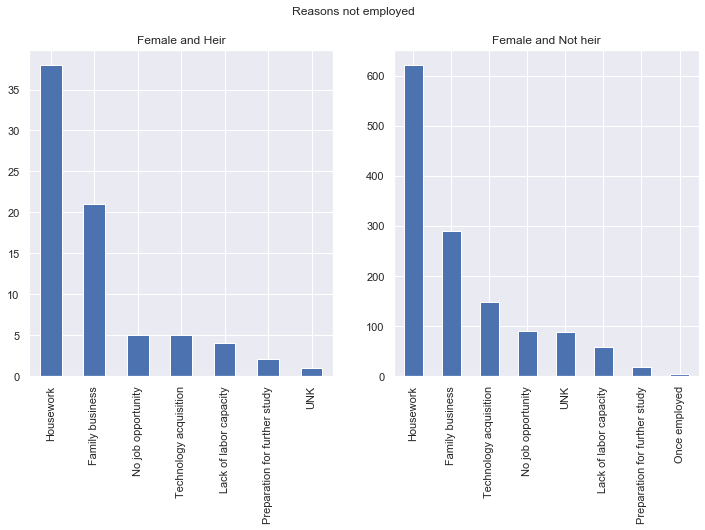

In [29]:
fig2, axs2 = plt.subplots(1,2, figsize = (12,6))
df[(df.heir == 'Y') & (df.gndr == 'F')].rsn.value_counts().plot(kind = 'bar', ax =axs2[0])
df[(df.heir == 'N') & (df.gndr == 'F')].rsn.value_counts().plot(kind = 'bar', ax = axs2[1])
axs2[0].title.set_text('Female and Heir')
axs2[1].title.set_text('Female and Not heir')
fig2.suptitle('Reasons not employed')
plt.show()

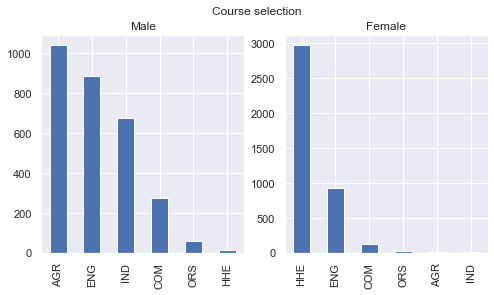

In [30]:
_df = df
fig2, axs2 = plt.subplots(1,2, figsize=(8, 4))
_df[_df.gndr == 'M'].crs1.value_counts().plot(kind = 'bar', ax =axs2[0])
_df[_df.gndr == 'F'].crs1.value_counts().plot(kind = 'bar', ax = axs2[1])
axs2[0].title.set_text('Male')
axs2[1].title.set_text('Female')
fig2.suptitle('Course selection')
plt.show()

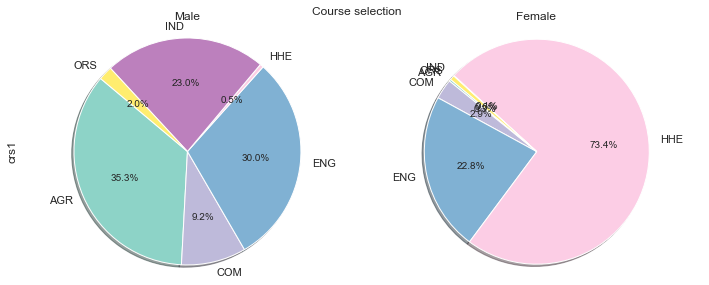

In [31]:
_df = df

fig2, axs2 = plt.subplots(1,2, figsize=(10, 4))
_df[_df.gndr == 'M'].crs1.value_counts().sort_index().plot.pie(ax =axs2[0],autopct='%1.1f%%',
shadow=True, startangle=140, cmap = 'Set3')
_df[_df.gndr == 'F'].crs1.value_counts().sort_index().plot.pie(ax = axs2[1],autopct='%1.1f%%',
shadow=True, startangle=140, cmap = 'Set3')
axs2[0].title.set_text('Male')
axs2[1].title.set_text('Female')
axs2[0].axis('equal')
axs2[1].axis('equal')
plt.axis('off')
fig2.suptitle('Course selection')
plt.tight_layout()
plt.show()

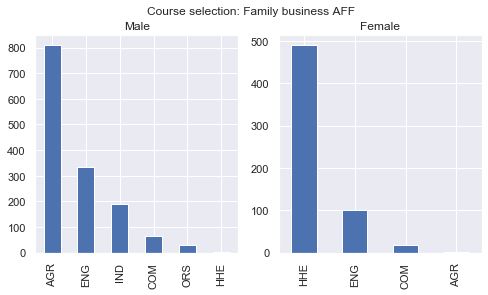

In [32]:
_df = df[df.fb =='AFF']
fig2, axs2 = plt.subplots(1,2, figsize=(8, 4))
_df[_df.gndr == 'M'].crs1.value_counts().plot(kind = 'bar', ax =axs2[0])
_df[_df.gndr == 'F'].crs1.value_counts().plot(kind = 'bar', ax = axs2[1])
axs2[0].title.set_text('Male')
axs2[1].title.set_text('Female')
fig2.suptitle('Course selection: Family business AFF')
plt.show()

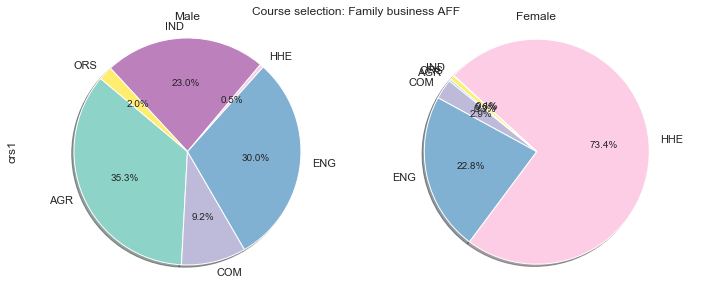

In [33]:
_df = df

fig2, axs2 = plt.subplots(1,2, figsize=(10, 4))
_df[_df.gndr == 'M'].crs1.value_counts().sort_index().plot.pie(ax =axs2[0],autopct='%1.1f%%',
shadow=True, startangle=140, cmap = 'Set3')
_df[_df.gndr == 'F'].crs1.value_counts().sort_index().plot.pie(ax = axs2[1],autopct='%1.1f%%',
shadow=True, startangle=140, cmap = 'Set3')
axs2[0].title.set_text('Male')
axs2[1].title.set_text('Female')
axs2[0].axis('equal')
axs2[1].axis('equal')
plt.axis('off')
fig2.suptitle('Course selection: Family business AFF')
plt.tight_layout()
plt.show()

In [34]:
df[df.fb == 'AFF']

,gakkou,gndr,crs1,crs2,crs3,crs4,crs5,crs6,heir,gdn_rel,gdn_occ,q4.3.1,fam_sz,rsn,q7,q8,fb
0,101,M,IND,NaN,NaN,NaN,NaN,NaN,Y,Eldest son / daughter,AFF,2,8,Family business,2,,AFF
3,101,M,IND,NaN,NaN,NaN,NaN,NaN,N,Second son / daughter,AFF,2,8,Family business,1,,AFF
10,101,M,COM,NaN,NaN,NaN,NaN,NaN,Y,Eldest son / daughter,AFF,2,5,Family business,2,,AFF
13,101,M,IND,NaN,NaN,NaN,NaN,NaN,N,Second son / daughter,AFF,2,7,Family business,1,,AFF
21,101,F,HHE,NaN,NaN,NaN,NaN,NaN,N,Second son / daughter,AFF,2,4,Family business,4,,AFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,1312,M,ENG,NaN,NaN,NaN,NaN,NaN,N,Second son / daughter,AFF,2,9,Family business,2,,AFF
8046,1312,M,ENG,NaN,NaN,NaN,NaN,NaN,Y,Eldest son / daughter,AFF,2,10,Family business,2,,AFF
8047,1312,M,ENG,NaN,NaN,NaN,NaN,NaN,N,Second son / daughter,AFF,2,7,Family business,2,,AFF
8048,1312,F,ENG,NaN,NaN,NaN,NaN,NaN,N,Eldest son / daughter,AFF,2,11,Family business,2,,AFF
